In [3]:

import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Load the JSON data
with open('result.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Extract training results for each dataset
def extract_training_results(dataset_name):
    return data[dataset_name]['training_results']

In [10]:


# Function to extract training data
def extract_data(dataset_name):
    dataset = data[dataset_name]
    epochs = [result['epoch'] for result in dataset['training_results']]
    training_losses = [result['training_loss'] for result in dataset['training_results']]
    dev_losses = [result['dev_loss'] for result in dataset['training_results']]
    entity_f1s = [result['entity_f1'] for result in dataset['training_results']]
    triple_f1s = [result['triple_f1'] for result in dataset['training_results']]
    entity_precisions = [result['entity_precision'] for result in dataset['training_results']]
    entity_recalls = [result['entity_recall'] for result in dataset['training_results']]
    triple_precisions = [result['triple_precision'] for result in dataset['training_results']]
    triple_recalls = [result['triple_recall'] for result in dataset['training_results']]
    
    return (epochs, training_losses, dev_losses, entity_f1s, triple_f1s, 
            entity_precisions, entity_recalls, triple_precisions, triple_recalls)


In [5]:
# Extract data for both datasets
webnlg_data = extract_data('webnlg')
nyt_data = extract_data('nyt')

/var/folders/50/0nhbb17x7qq2y8j1r2hw2q_00000gn/T/ipykernel_14835/3589393501.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


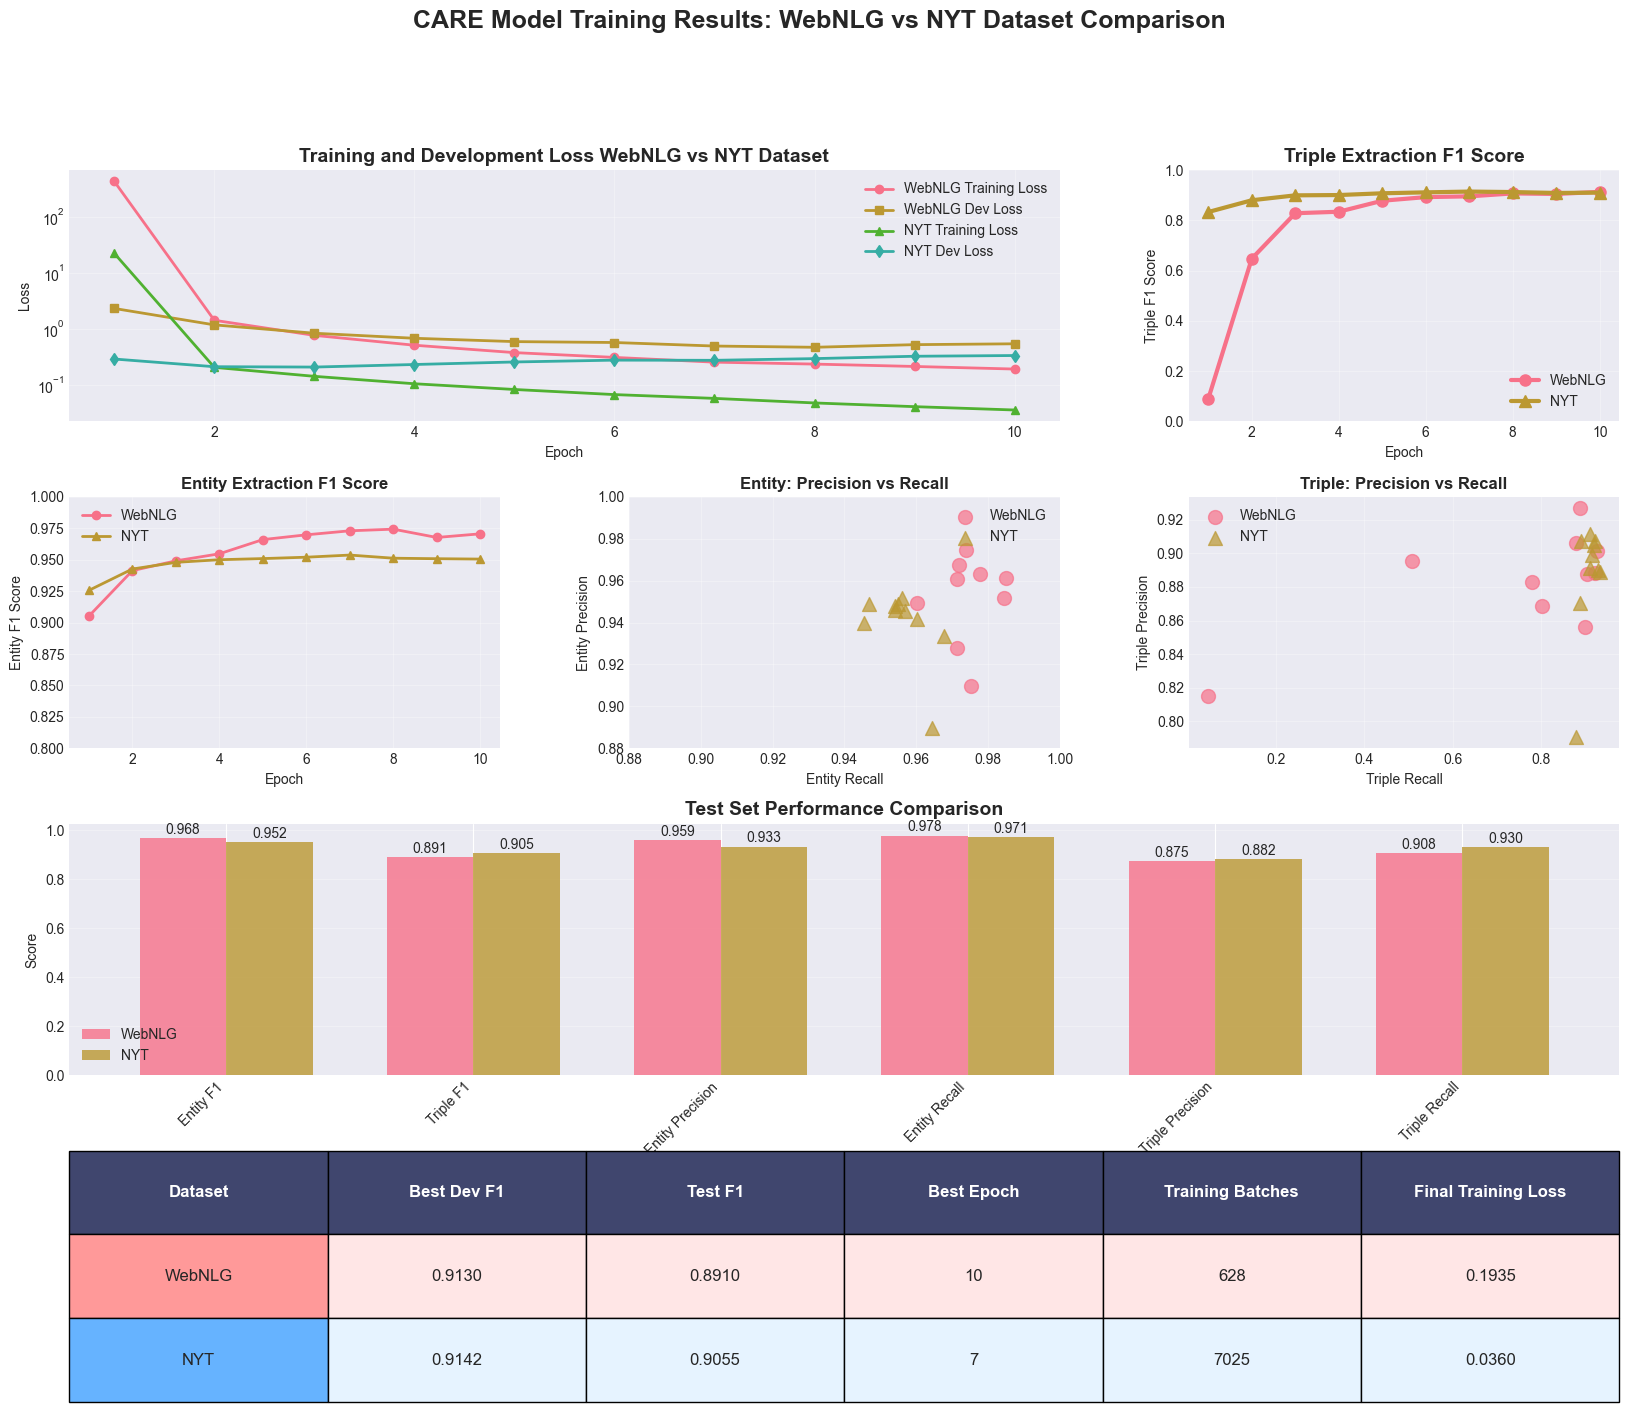

In [14]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create a comprehensive visualization
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(4, 3, figure=fig, hspace=0.3, wspace=0.3)
# 1. Training and Development Loss Comparison
ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(webnlg_data[0], webnlg_data[1], 'o-', label='WebNLG Training Loss', linewidth=2, markersize=6)
ax1.plot(webnlg_data[0], webnlg_data[2], 's-', label='WebNLG Dev Loss', linewidth=2, markersize=6)
ax1.plot(nyt_data[0], nyt_data[1], '^-', label='NYT Training Loss', linewidth=2, markersize=6)
ax1.plot(nyt_data[0], nyt_data[2], 'd-', label='NYT Dev Loss', linewidth=2, markersize=6)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Development Loss WebNLG vs NYT Dataset', fontsize=14, fontweight='bold')

ax1.legend()
ax1.set_yscale('log')  # Log scale for better visualization due to large difference in initial losses
ax1.grid(True, alpha=0.3)

# 2. F1 Score Comparison - Triple Extraction
ax2 = fig.add_subplot(gs[0, 2])
ax2.plot(webnlg_data[0], webnlg_data[4], 'o-', label='WebNLG', linewidth=3, markersize=8)
ax2.plot(nyt_data[0], nyt_data[4], '^-', label='NYT', linewidth=3, markersize=8)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Triple F1 Score')
ax2.set_title('Triple Extraction F1 Score', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1)

# 3. Entity F1 Score Comparison
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(webnlg_data[0], webnlg_data[3], 'o-', label='WebNLG', linewidth=2, markersize=6)
ax3.plot(nyt_data[0], nyt_data[3], '^-', label='NYT', linewidth=2, markersize=6)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Entity F1 Score')
ax3.set_title('Entity Extraction F1 Score', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0.8, 1)

# 4. Precision vs Recall for Entity Extraction
ax4 = fig.add_subplot(gs[1, 1])
ax4.scatter(webnlg_data[6], webnlg_data[5], s=100, alpha=0.7, label='WebNLG', marker='o')
ax4.scatter(nyt_data[6], nyt_data[5], s=100, alpha=0.7, label='NYT', marker='^')
ax4.set_xlabel('Entity Recall')
ax4.set_ylabel('Entity Precision')
ax4.set_title('Entity: Precision vs Recall', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0.88, 1.0)
ax4.set_ylim(0.88, 1.0)

# 5. Precision vs Recall for Triple Extraction
ax5 = fig.add_subplot(gs[1, 2])
ax5.scatter(webnlg_data[8], webnlg_data[7], s=100, alpha=0.7, label='WebNLG', marker='o')
ax5.scatter(nyt_data[8], nyt_data[7], s=100, alpha=0.7, label='NYT', marker='^')
ax5.set_xlabel('Triple Recall')
ax5.set_ylabel('Triple Precision')
ax5.set_title('Triple: Precision vs Recall', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Performance Metrics Summary Bar Chart
ax6 = fig.add_subplot(gs[2, :])
metrics = ['Entity F1', 'Triple F1', 'Entity Precision', 'Entity Recall', 'Triple Precision', 'Triple Recall']
webnlg_test = [data['webnlg']['test_results']['entity_f1'], 
               data['webnlg']['test_results']['triple_f1'],
               data['webnlg']['test_results']['entity_precision'],
               data['webnlg']['test_results']['entity_recall'],
               data['webnlg']['test_results']['triple_precision'],
               data['webnlg']['test_results']['triple_recall']]
nyt_test = [data['nyt']['test_results']['entity_f1'], 
            data['nyt']['test_results']['triple_f1'],
            data['nyt']['test_results']['entity_precision'],
            data['nyt']['test_results']['entity_recall'],
            data['nyt']['test_results']['triple_precision'],
            data['nyt']['test_results']['triple_recall']]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax6.bar(x - width/2, webnlg_test, width, label='WebNLG', alpha=0.8)
bars2 = ax6.bar(x + width/2, nyt_test, width, label='NYT', alpha=0.8)

ax6.set_xlabel('Metrics')
ax6.set_ylabel('Score')
ax6.set_title('Test Set Performance Comparison', fontsize=14, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(metrics, rotation=45, ha='right')
ax6.legend()
ax6.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

add_value_labels(ax6, bars1)
add_value_labels(ax6, bars2)

# 7. Training Progress Summary Table
ax7 = fig.add_subplot(gs[3, :])
ax7.axis('tight')
ax7.axis('off')

# Create summary table data
table_data = [
    ['Dataset', 'Best Dev F1', 'Test F1', 'Best Epoch', 'Training Batches', 'Final Training Loss'],
    ['WebNLG', f"{data['webnlg']['best_f1']:.4f}", 
     f"{data['webnlg']['test_results']['triple_f1']:.4f}", 
     '10', '628', f"{webnlg_data[1][-1]:.4f}"],
    ['NYT', f"{data['nyt']['best_f1']:.4f}", 
     f"{data['nyt']['test_results']['triple_f1']:.4f}", 
     '7', '7025', f"{nyt_data[1][-1]:.4f}"]
]

table = ax7.table(cellText=table_data[1:], colLabels=table_data[0], 
                  cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Style the table
for i in range(len(table_data[0])):
    table[(0, i)].set_facecolor('#40466e')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color code the rows
table[(1, 0)].set_facecolor('#ff9999')  # WebNLG row
table[(2, 0)].set_facecolor('#66b3ff')  # NYT row
for i in range(1, len(table_data[0])):
    table[(1, i)].set_facecolor('#ffe6e6')  # WebNLG row
    table[(2, i)].set_facecolor('#e6f3ff')  # NYT row

plt.suptitle('CARE Model Training Results: WebNLG vs NYT Dataset Comparison', 
             fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()



In [9]:
# Print summary statistics
print("="*60)
print("CARE MODEL TRAINING SUMMARY")
print("="*60)
print(f"WebNLG Dataset:")
print(f"  - Best Dev Triple F1: {data['webnlg']['best_f1']:.4f}")
print(f"  - Test Triple F1: {data['webnlg']['test_results']['triple_f1']:.4f}")
print(f"  - Test Entity F1: {data['webnlg']['test_results']['entity_f1']:.4f}")
print(f"  - Training completed in 10 epochs")
print()
print(f"NYT Dataset:")
print(f"  - Best Dev Triple F1: {data['nyt']['best_f1']:.4f}")
print(f"  - Test Triple F1: {data['nyt']['test_results']['triple_f1']:.4f}")
print(f"  - Test Entity F1: {data['nyt']['test_results']['entity_f1']:.4f}")
print(f"  - Training completed in 10 epochs")
print()
print("Key Observations:")
print("- NYT dataset achieved higher Triple F1 score on both dev and test sets")
print("- WebNLG showed better Entity extraction performance")
print("- Both models converged well within 10 epochs")
print("- NYT dataset is significantly larger (7025 vs 628 training batches)")

CARE MODEL TRAINING SUMMARY
WebNLG Dataset:
  - Best Dev Triple F1: 0.9130
  - Test Triple F1: 0.8910
  - Test Entity F1: 0.9683
  - Training completed in 10 epochs

NYT Dataset:
  - Best Dev Triple F1: 0.9142
  - Test Triple F1: 0.9055
  - Test Entity F1: 0.9515
  - Training completed in 10 epochs

Key Observations:
- NYT dataset achieved higher Triple F1 score on both dev and test sets
- WebNLG showed better Entity extraction performance
- Both models converged well within 10 epochs
- NYT dataset is significantly larger (7025 vs 628 training batches)


In [12]:
def plot_training_curves(train_losses, dev_losses, train_f1s, dev_f1s, dataset_name):
    """
    Vẽ biểu đồ loss và F1-score theo epoch
    """
    epochs = range(1, len(train_losses) + 1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot Loss
    ax1.plot(epochs, train_losses, 'b-', label='Train Loss', linewidth=2)
    ax1.plot(epochs, dev_losses, 'r-', label='Dev Loss', linewidth=2)
    ax1.set_title(f'{dataset_name} - Training and Validation Loss', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Plot F1 Score
    ax2.plot(epochs, train_f1s, 'b-', label='Train F1', linewidth=2)
    ax2.plot(epochs, dev_f1s, 'r-', label='Dev F1', linewidth=2)
    ax2.set_title(f'{dataset_name} - Training and Validation F1 Score', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('F1 Score', fontsize=12)
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

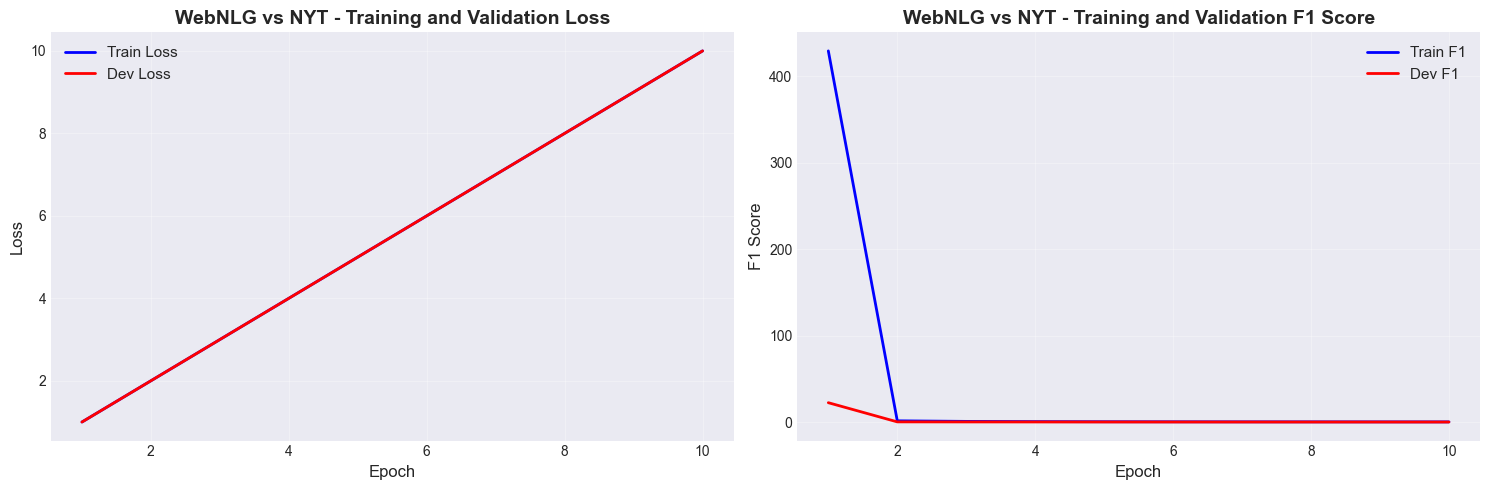

In [13]:
web_data_loss = webnlg_data[0]
web_data_f1 = webnlg_data[1]
web_data_epoch = webnlg_data[2]

nyt_data_loss = nyt_data[0]
nyt_data_f1 = nyt_data[1]
nyt_data_epoch = nyt_data[2]

plot_training_curves(web_data_loss, nyt_data_loss, web_data_f1, nyt_data_f1, 'WebNLG vs NYT')